# COMP 484 - Practical Assignment 3

#### Ramraj Chimouriya
#### CE IV/I

## Chapter 10 - Topic Modeling

___
### Latent Dirichlet allocation 

In [1]:
import gensim
from gensim import corpora, models

import matplotlib.pyplot as plt
import numpy as np
from os import path

%matplotlib inline

In [2]:
if not path.exists('./data/ap/ap.dat'):
    print('Error: Expected data to be present at data/ap/')
    print('Please cd into ./data & run ./download_ap.sh')

In [3]:
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt') 

In [4]:
model = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word) 

In [5]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(3, 0.48419908), (14, 0.031574678), (19, 0.09973399), (60, 0.028862298), (64, 0.092458636), (67, 0.06456175), (71, 0.01633189), (74, 0.0846558), (88, 0.08412446)]


Histogram for topics used.

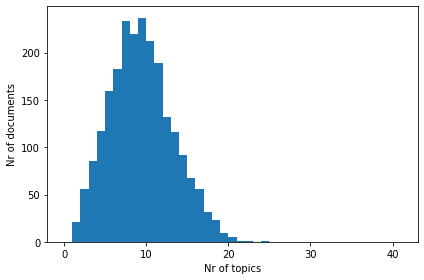

In [6]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()

The smaller the value of alpha, the fewer topics each document will be expected to discuss.

In [7]:
model1 = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word,
    alpha=1.0)

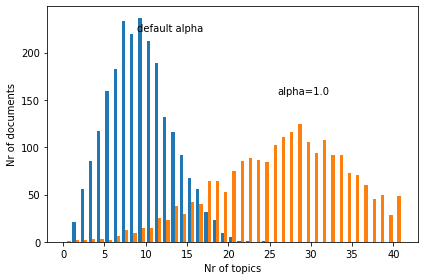

In [8]:
num_topics_used1 = [len(model1[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()

### Exploring the topic model

Printing all topics can be a way but isn't informative.

In [9]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(3, 0.48515728), (14, 0.031512845), (19, 0.09965634), (60, 0.028906558), (64, 0.09210594), (67, 0.06562891), (71, 0.016361032), (74, 0.08470292), (88, 0.084131844)]


Another way can be to identify the most discussed topics.

In [10]:
from gensim import matutils
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [11]:
words = model.show_topic(max_topic, 64)

Using wordcloud module to create wordcloud of those topics.

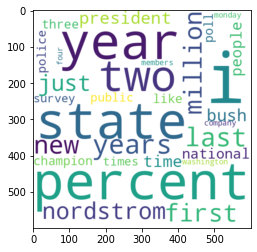

In [12]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color='white',
    max_words=30,
    width=600,
    height=600)
wc = wc.generate_from_frequencies(dict(words))


fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

### Comparing documents by topic

In [13]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()
words = model.show_topic(max_topic, 64)

In [14]:
from scipy.spatial import distance
distances = distance.squareform(distance.pdist(topics)) 

In [15]:
for ti in range(len(topics)):
 distances[ti,ti] = np.inf

In [16]:
def closest_to(doc_id):
 return distances[doc_id].argmin() 

In [17]:
closest_to(1)

45